---
layout: default
title: "Anomaly Detection"
categories: anomaly
permalink: /ML24/
order: 24
comments: true
---

In [126]:
%pylab --no-import-all inline
plt.rcParams["mathtext.fontset"] = "cm"
from scipy.signal import gaussian
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Anomaly Detection
Anomaly detection describes a class of problems that many consider unsupervised but also have some aspect of supervised problems.

Anomaly detection is best explained through an example: suppose you are a aircraft engine manufacturer and, as part of your quality assurance testing, you measure a set of features of your manufactured engines. For this example the heat generated $x_1$ and the vibration intensity $x_2$.

The results of your measurements is a dataset $\left \lbrace x^{(1)}, x^{(2)}, \ldots, x^{(m)} \right \rbrace$ (<a href="#engines">figure below</a>)

In [28]:
mu, sigma = 0, 0.01 # mean and standard deviation
data = np.random.default_rng().normal(mu, sigma, (50, 2))

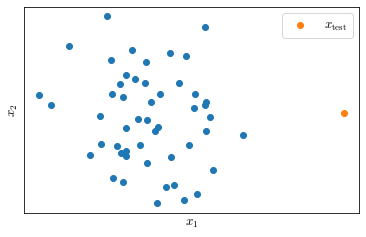

In [39]:
fig, ax = plt.subplots()
ax.scatter(*data.T)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x_1$', fontsize=13)
ax.set_ylabel('$x_2$', fontsize=13)
ax.scatter(.05, 0, label='$x_\\mathrm{test}$')
ax.legend(fontsize=13);

<i id="engines">Results of quality assurance measurements performed on newly manufactured engines plotted in their features space $x_1, x_2$ and a new engine $x_\text{test}$</i>

Given a new example $x_\text{test}$, anomaly detection tries to answer the question: is the new example anomalous in any way?

In order to answer this question we are going to build a model of the probability of $x$ to be in a specific point of the feature space $p(x)$; If $p(x_\text{test}) < \varepsilon$ we will flag it as an anomaly (where $\varepsilon$ is a small number).

## Gaussian Distribution
Suppose $x \in \mathbb{R}$. If $x$ distributes as a Gaussian distributions with mean $\mu$ and variance $\sigma^2$, it means that its distributes resembles that in <a href="#gaussian">the figure below</a>.

In [79]:
y = np.random.default_rng().normal(0, .1, 100000)

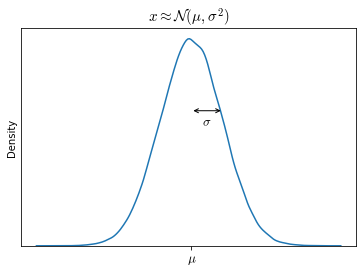

In [98]:
ax = sns.kdeplot(y)
ax.set_title(r'$x \approx \mathcal{N}(\mu, \sigma^2)$', fontsize=15)
ax.set_xticks([0])
ax.set_yticks([])
ax.set_xticklabels(['$\\mu$'], fontsize=13)
plt.annotate(text='', xy=(0.0,2.6), xytext=(0.1,2.6), arrowprops=dict(arrowstyle='<->'))
ax.text(0.05, 2.5, '$\sigma$', va='top', ha='center', fontsize=13);

<i id="gaussian">Kernel density plot calculated from 100,000 points randomly drawn from a Gaussian distribution with mean $\mu$ and variance $\sigma^2$</i>

The function of the Gaussian distribution is

$$
p(x;\mu, \sigma^2)=\frac{1}{\sigma \sqrt{2 \pi}}  \left( - \frac{(x-\mu)^2}{2\sigma^2} \right)
$$

## Parameter estimation
Suppose you have a dataset $\lbrace x^{(1)}, x^{(2)}, \ldots, x^{(m)} \rbrace$ with $x^{(i)} \in \mathbb{R}$ (<a href="#paramestim">figure below</a>) and you suspect that they are Gaussian distributed with each $x^{(i)} \approx \mathcal{N}(\mu, \sigma^2)$ but I don't know the values of the two parameters $\mu$ and $\sigma^2$

In [106]:
x = np.random.default_rng().normal(0, .1, 50)

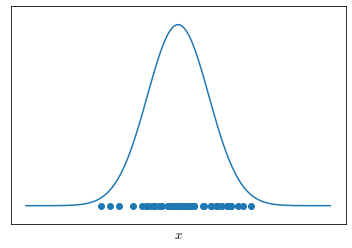

In [147]:
fig, ax = plt.subplots()
ax.scatter(x, np.zeros_like(x))
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x$', fontsize=13)
ax.set_ylim(-0.1, 1.1)
ax.plot(np.linspace(-.5, .5, 100), gaussian(100, std=10));

<i id="paramestim">Data distributed on the $x$ axis and their Gaussian density estimation</i>

The parameters can be estimated from $x$, we will have

$$
\mu= \frac{1}{m} \sum^m_{i=1}x^{(i)}  \qquad \qquad \sigma^2 = \frac{1}{m}\sum^m_{i=1}(x^{(i)} - \mu)^2
$$

## Anomaly detection algorithm
Given a $m \times n$ training set $x \in \mathbb{R}^n$

The anomaly detection algorithm requires that parameters are fitted **for each feature $x_j$**:

$$
\mu_j= \frac{1}{m} \sum^m_{i=1}x_j^{(i)}  \qquad \qquad \sigma_j^2 = \frac{1}{m}\sum^m_{i=1}(x_j^{(i)} - \mu_j)^2
$$

Then, Given a  new example $x$, compute $p(x)$:

$$
\begin{align}
p(x) & = p(x_1; \mu_1,\sigma^2_1)p(x_2; \mu_2,\sigma^2_2),\ldots,p(x_n; \mu_n,\sigma^2_n) \\
& = \prod^n_{j=1}p(x_j; \mu_j,\sigma^2_j) \\
& = \prod^n_{j=1}\frac{1}{\sigma_j \sqrt{2 \pi}}  \left( - \frac{(x_j-\mu_j)^2}{2\sigma_j^2} \right)
\end{align}
$$